<a href="https://colab.research.google.com/github/AslanDevbrat/Geoinformatics/blob/main/Find%20Junctions/River%20Junction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install elevation
!pip install richdem
!pip install pysheds
!pip install plantcv
!apt install imagemagick

     |████████████████████████████████| 71kB 4.3MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     |████████████████████████████████| 4.5MB 5.0MB/s 
     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 6.5MB 9.1MB/s 
     |████████████████████████████████| 19.1MB 204kB/s 
  Created wheel for pysheds: filename=pysheds-0.2.7-cp36-none-any.whl size=51838 sha256=a94c28ab11fd7fecc1ade800ec060fe021a3592f6acd895f739d17e1ada1810f
  Stored in directory: /root/.cache/pip/wheels/e4/87/6f/f67cbfbc39ea2c76e0cb801c37590b9e3c47e9eee7baea2547
Successfully built pysheds
     |████████████████████████████████| 215kB 5.0MB/s 
     |████████████████████████████████| 48.6MB 96kB/s 
     |████████████████████████████████| 675kB 41.2MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
  C

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

In [ ]:
shasta_dem = rd.LoadGDAL('/content/drive/MyDrive/Geoinformatics/Project1/Dataset/Patna left.tif')

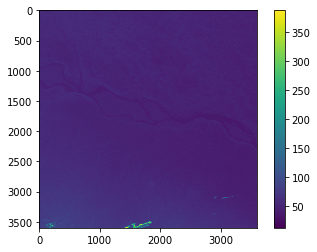

In [ ]:
plt.imshow(shasta_dem, interpolation='none')
plt.colorbar()
plt.show()

Finding the SLOPE

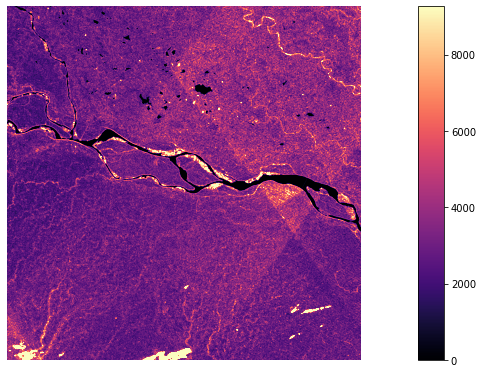

In [ ]:
slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

Findinf the Aspect

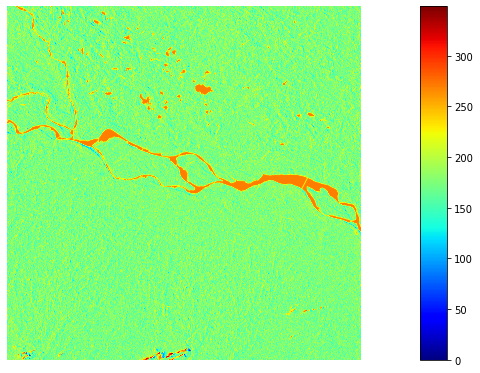

In [ ]:
aspect = rd.TerrainAttribute(shasta_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

Finding the Flow Accumulation.

/usr/local/lib/python3.6/dist-packages/richdem/__init__.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


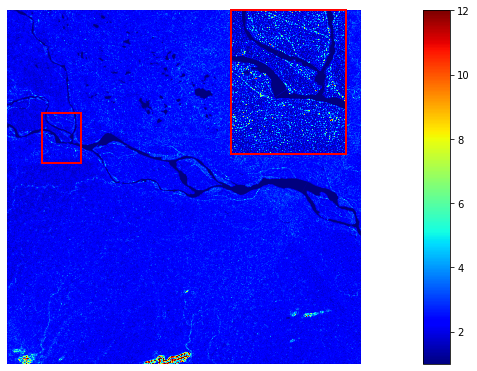

In [ ]:
accum = rd.FlowAccumulation(shasta_dem , method='Rho8' , in_place=True)

d8_fig = rd.rdShow(accum, zxmin=350, zxmax=750, zymin=1550, zymax=1050, figsize=(8,5.5), axes=False , cmap ='jet')

In [ ]:
len(accum)

3601

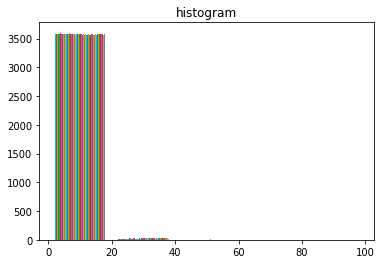

In [ ]:
plt.hist(np.array(accum), bins = [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show()

[  0. 255.]


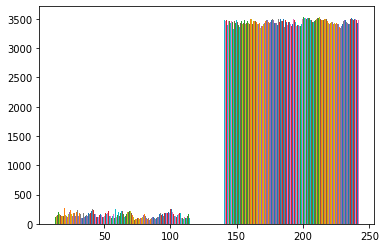

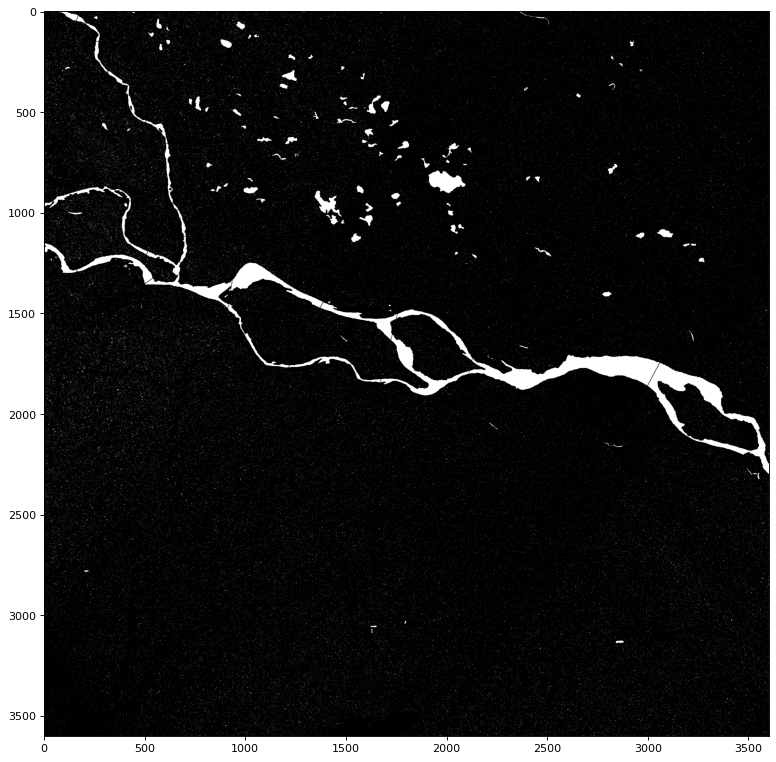

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
arr = np.array(slope)
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y <1 and aspect[i][j] >265:
      arr[i][j] = 0
    else:
      arr[i][j] = 255  
plt.hist(arr,bins=2)
print(np.unique(arr))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(arr,cmap='binary')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


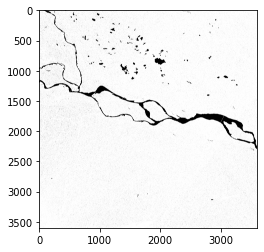

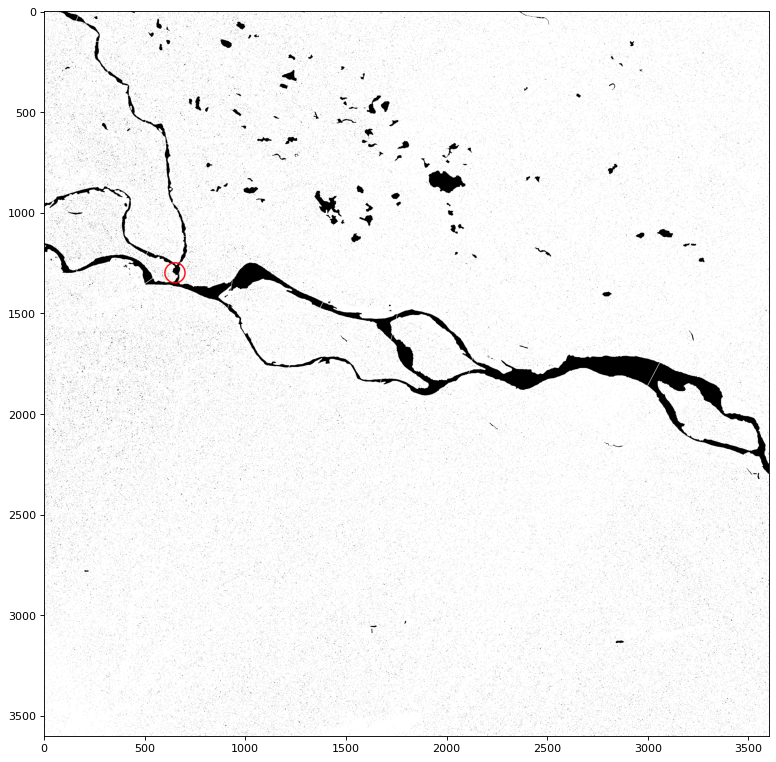

In [ ]:
import cv2
colored_image = cv2.cvtColor(arr,cv2.COLOR_GRAY2RGB) 
plt.imshow(colored_image)
image = cv2.circle(colored_image, (650, 1300), radius=50, color=(255, 0, 0), thickness=5)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)
image1 = image.copy()

In [ ]:
from skimage.io import imsave, imread
imsave("black_white.png", image1)

In [ ]:
import cv2
import numpy as np

img = cv2.imread('black_white.png')
img_bw = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 5).astype('uint8')

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

mask = np.dstack([mask, mask, mask]) / 255
out = img * mask
blur = cv2.GaussianBlur(out,(3,3),10)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(blur)


In [ ]:
cv_image = cv2.imread('black_white.png')

rho, theta, thresh = 2, np.pi/180, 400
lines = cv2.HoughLines(cv_image, rho, theta, thresh)


error: ignored

In [ ]:
arr = np.array(slope)
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y <15 :
      arr[i][j] = 0
    else:
      arr[i][j] = 1
np.unique(arr)

array([0., 1.], dtype=float32)

In [ ]:
np.unique

<function numpy.unique>

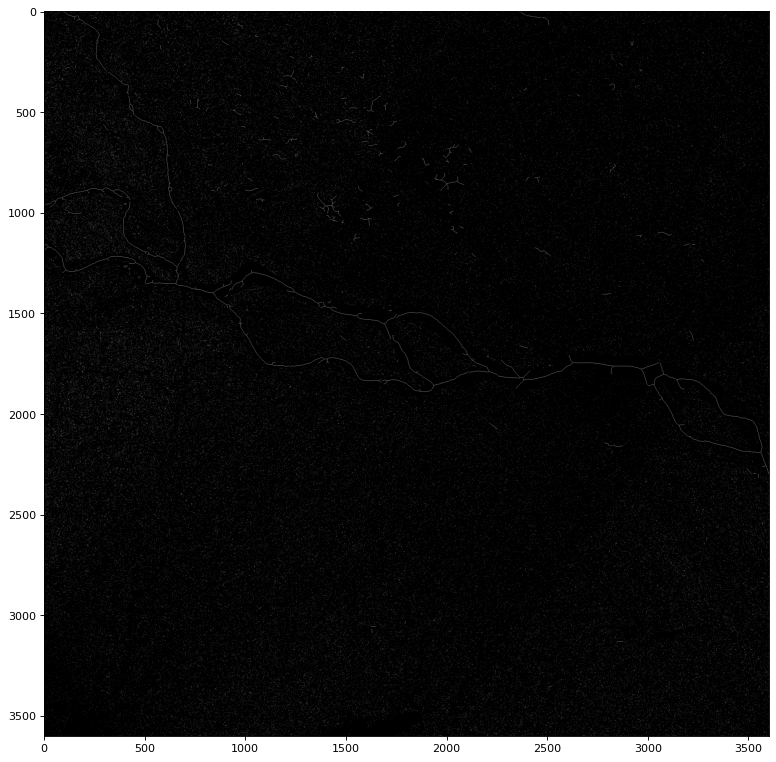

In [ ]:
from skimage.morphology import skeletonize
from skimage.util import invert


image = invert(arr.copy())
skeleton = skeletonize(image.astype(int))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(skeleton, cmap = 'gray')

In [ ]:
from skimage import morphology
b =morphology.remove_small_objects(skeleton, 30, connectivity=20)
imsave('remove_obj.png', b.astype(int))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: remove_obj.png is a low contrast image
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

! convert remove_obj.png -morphology HMT LineJunctions junction_points.png

In [ ]:
junction_img = imread('junction_points.png')
junction_list = []

for i, row in enumerate(junction_img):
  for j , col in enumerate(row):

    if junction_img[i][j] == 255:
      junction_list.append((j,i))

In [ ]:
print(len(junction_list))

162


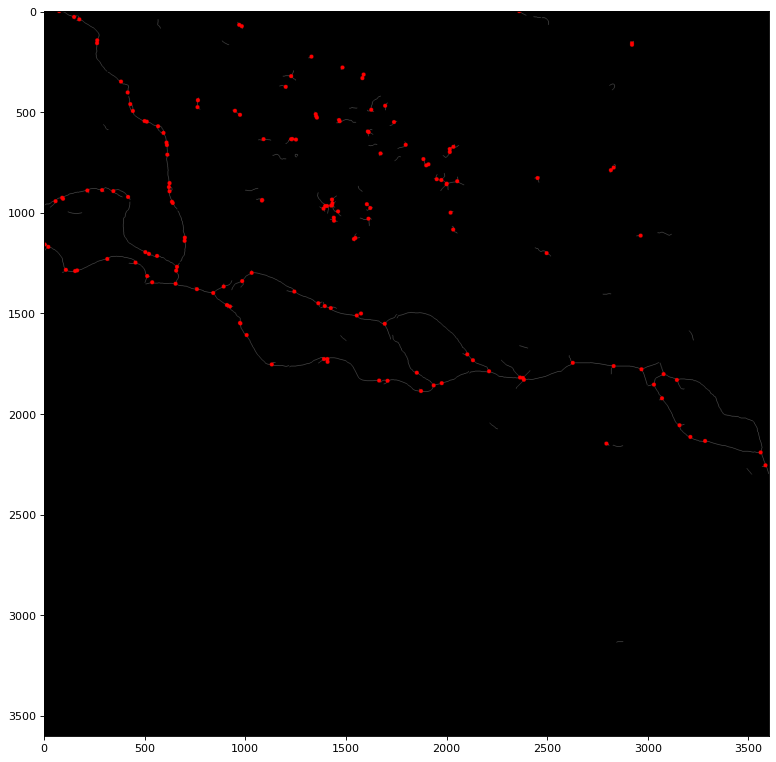

In [ ]:
ske_image = cv2.imread('remove_obj.png')
for junc in junction_list:
  image = cv2.circle(ske_image, junc, radius=10, color=(255, 0, 0), thickness=-1)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)  


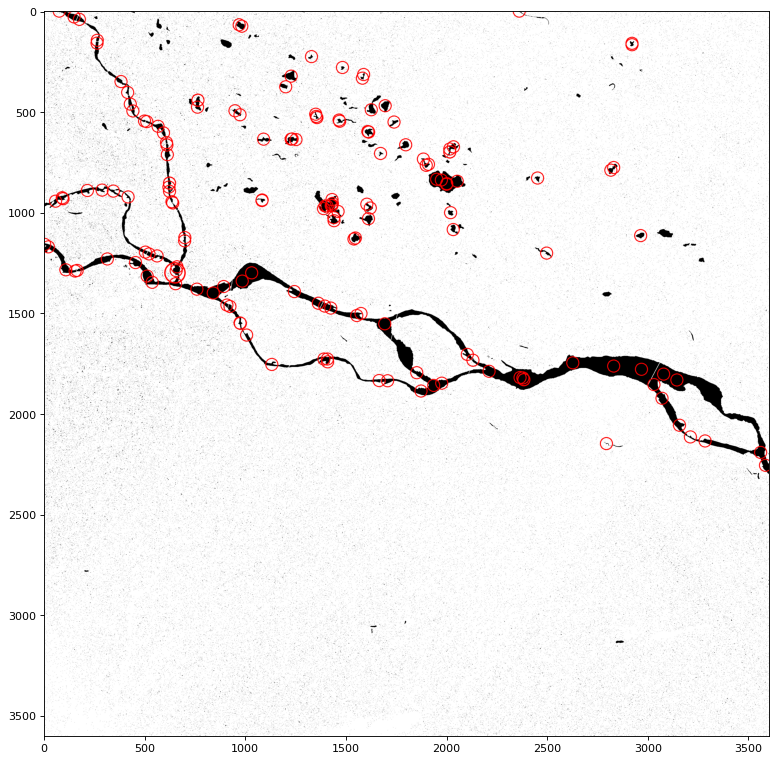

In [ ]:
image1 = imread('black_white.png')
image = cv2.circle(image1, (650, 1300), radius=50, color=(255, 0, 0), thickness=5)
for junc in junction_list:
  image = cv2.circle(image, junc, radius=30, color=(255, 0, 0), thickness=3)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)  

In [ ]:
import cv2
import numpy as np

# Load image, grayscale, Gaussian blur, Otsus threshold
image = cv2.imread('black_white.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Find horizonal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

# Find vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Find joints
joints = cv2.bitwise_and(horizontal, vertical)

# Find centroid of the joints
cnts = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    # Find centroid and draw center point
    M = cv2.moments(c)
    
    if M["m00"] != 0:
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
    else:
    # set values as what you need in the situation
      cX, cY = 0, 0
    
    cv2.circle(image, (cX, cY), 3, (36,255,12), -1)

cv2.imwrite('thresh.png', thresh)
cv2.imwrite('horizontal.png', horizontal)
cv2.imwrite('vertical.png', vertical)
cv2.imwrite('joints.png',joints)
cv2.imwrite('image.png', image)


True

In [ ]:
plt.imshow(image)

In [ ]:
plt.imshow(joints)

In [ ]:
junction_img = cv.imread('hmt_lineends.png',-1)
junction_list = []
for i, x in enumerate(junction_img):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if junction_img[i][j] == 255:
      junction_list.append((i,j))

In [ ]:
image = cv2.circle(image1, (650, 1300), radius=5, color=(255, 0, 0), thickness=-1)
for junc in junction_list:
  if slope[junc[0]][junc[1]]==0 and aspect[junc[0]][junc[1]]>260 and accum[junc[0]][junc[1]]>10:
    print('hai')
    image = cv2.circle(image, junc, radius=20, color=(255, 0, 0), thickness=-1)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)  

In [ ]:
skeleton.shape

(3601, 3601)

In [ ]:
print(skeleton)

[[ True False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
just = [[1 for col in range(len(skeleton_int))] for row in range(len(skeleton_int))]
print(just)

In [ ]:
just1 = np.array(just)

In [ ]:
just1.shape

(3601, 3601)

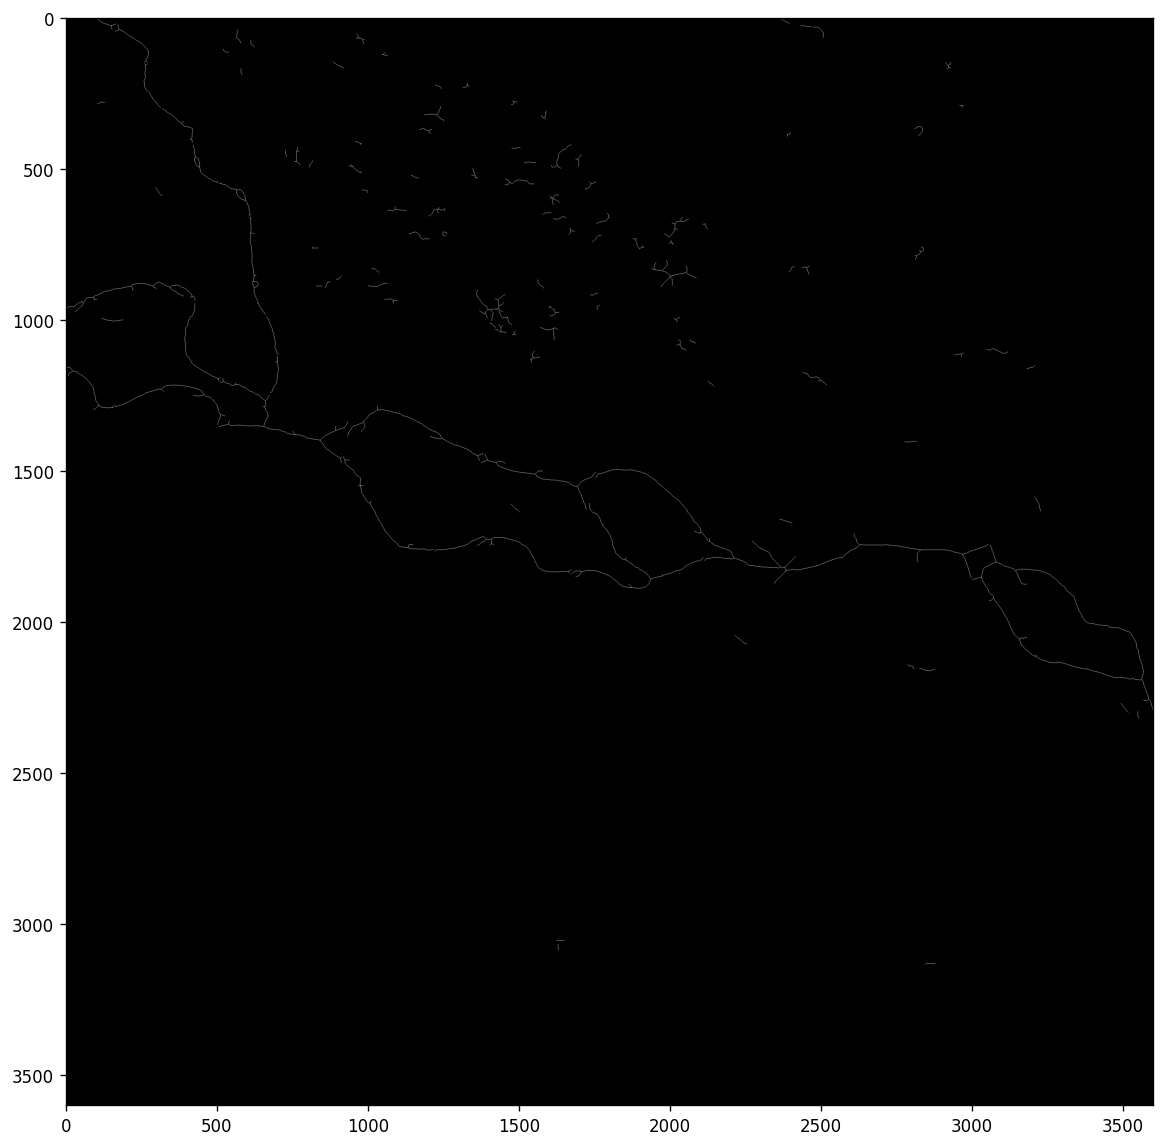

In [ ]:
skeleton_int = imread('remove_obj.png')


figure(num=None, figsize=(12, 12), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(skeleton_int, cmap = 'gray')

In [ ]:
int_skeleton = skeleton.astype(int).copy()

In [ ]:
north = 0
north_east = 0
east = 0
south_east = 0
south= 0
south_west = 0
west = 0
north_west = 0
junction = 0

junction_list =[]
for i in range(0, len(int_skeleton),2):
  for j in range(0,len(row), 2):
    if j+2 >= len(row) or i+2 >=len(int_skeleton):
      continue

    if aspect[j+1][i+1]>265 and slope[j+1][i+1]==0and int_skeleton[j+1][i+1] == 1:

      if int_skeleton[j][i] == 1 and slope[j][i]  < 2 and aspect[j][i]>=265:
        north_west = 1
      if int_skeleton[i][j+1] ==1 and slope[j][i+1]  < 2 and aspect[j][i+1]>=265:
        north = 1
      if int_skeleton[j][i+2] ==1 and slope[j][i+2]  < 2 and aspect[j][i+2]>=265:
        north_east = 1
      if int_skeleton[j+1][i] ==1 and slope[j+1][i]  < 2 and aspect[j+1][i]>=265:
        west = 1
      if int_skeleton[j+1][i+2] == 1 and slope[j+1][i+2]  < 2 and aspect[j+1][i+2]>=265:
        east = 1
      if int_skeleton[j+2][i] == 1  and slope[j+2][i]  < 2 and aspect[j+2][i]>=265:
        south_west = 1
      if int_skeleton[j+2][i+1] == 1 and slope[j+2][i+1]  < 2 and aspect[j+2][i+1]>=265:
        south = 1
      if int_skeleton[j+2][i+2] ==1 and slope[j+2][i+2]  < 2 and aspect[j+2][i+2]>=265:
        south_east = 1
      #print(i,j)
      if north+ north_east+ east+south_east +south+south_west+west+north_west >=3 :
        
        junction+=1
        junction_list.append((j+1,i+1))
        #print(junction_list)
      north = 0
      north_east = 0
      east = 0
      south_east = 0
      south= 0
      south_west = 0
      west = 0
      north_west = 0
      
print(len(junction_list))

163


In [ ]:
len(junction_list)

188

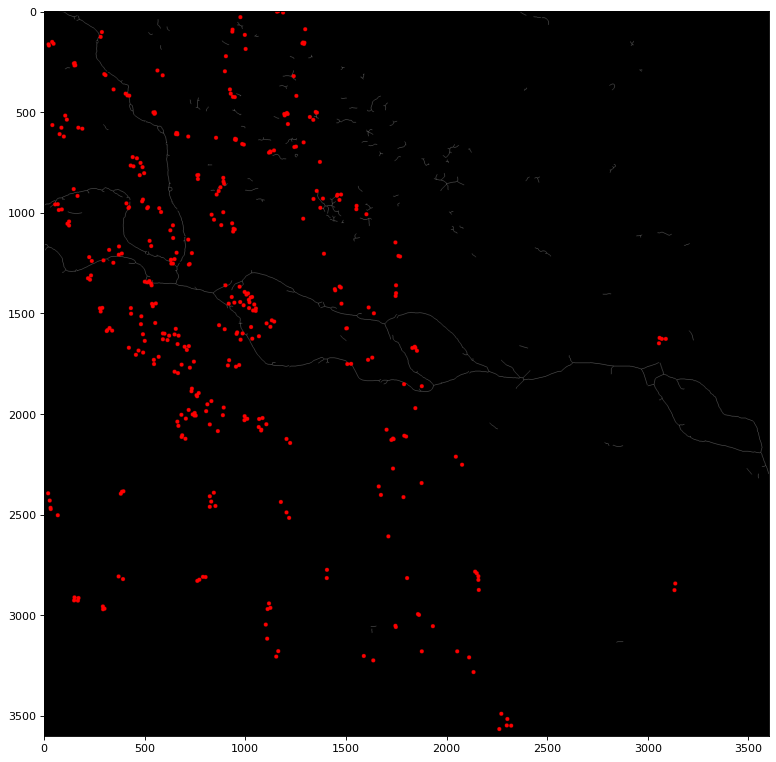

In [ ]:
ske_image = cv2.imread('remove_obj.png')
for junc in junction_list:
  image = cv2.circle(ske_image, junc, radius=10, color=(255, 0, 0), thickness=-1)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)  

In [ ]:
for i, row in enumerate(skeleton_int):
  for j, col in enumerate(row):
    if just1[i][j]>2:
      print(i,j)

In [ ]:
from pysheds.grid import Grid
grid = Grid.from_raster('/content/drive/MyDrive/Geoinformatics/Project1/Dataset/Patna left.tif', data_name='dem')
plt.imshow(grid.dem, extent=grid.extent, cmap='cubehelix', zorder=1)


In [ ]:
rho, theta, thresh = 2, np.pi/180, 400
lines = cv2.HoughLines(np.float16(skeleton_int), rho, theta, thresh)

TypeError: ignored

In [ ]:
gifrom skimage.io import imsave, imread
imsave("test.png", skeleton.astype(int))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: test.png is a low contrast image
  


In [ ]:
np.unique(junction_points)

array([  0, 255], dtype=uint8)

In [ ]:
junction_points = imread('jnction_points.png')
junction_list = []
for i , row in enumerate(junction_points):
  for j, col in enumerate(row):
    if junction_points[i][j] == 255:
      junction_list.append((i,j))
print(len(junction_list))

384


In [ ]:

from plantcv import plantcv as pcv

# Set global debug behavior to None (default), "print" (to file), 
# or "plot" (Jupyter Notebooks or X11)
pcv.params.debug = "None"

branch_points_img = pcv.morphology.find_branch_pts(skel_img=cv2.imread('remove_obj.png',-1))
# Adjust line thickness with the global line thickness parameter (default = 5),
# and provide binary mask of the plant for debugging. NOTE: the image returned
# will be exactly the same, but the debugging image will look different. 
pcv.params.line_thickness = 2

branch_points_img = pcv.morphology.find_branch_pts(skel_img=cv2.imread('remove_obj.png',-1), mask=None)
branch_points_img = pcv.morphology.find_branch_pts(skel_img=cv2.imread('remove_obj.png',-1), mask=plant_mask)

In [ ]:
def getSkeletonIntersection(skeleton):
    """ Given a skeletonised image, it will give the coordinates of the intersections of the skeleton.

    Keyword arguments:
    skeleton -- the skeletonised image to detect the intersections of

    Returns: 
    List of 2-tuples (x,y) containing the intersection coordinates
    """
    # A biiiiiig list of valid intersections             2 3 4
    # These are in the format shown to the right         1 C 5
    #                                                    8 7 6 
    validIntersection = [[0,1,0,1,0,0,1,0],[0,0,1,0,1,0,0,1],[1,0,0,1,0,1,0,0],
                         [0,1,0,0,1,0,1,0],[0,0,1,0,0,1,0,1],[1,0,0,1,0,0,1,0],
                         [0,1,0,0,1,0,0,1],[1,0,1,0,0,1,0,0],[0,1,0,0,0,1,0,1],
                         [0,1,0,1,0,0,0,1],[0,1,0,1,0,1,0,0],[0,0,0,1,0,1,0,1],
                         [1,0,1,0,0,0,1,0],[1,0,1,0,1,0,0,0],[0,0,1,0,1,0,1,0],
                         [1,0,0,0,1,0,1,0],[1,0,0,1,1,1,0,0],[0,0,1,0,0,1,1,1],
                         [1,1,0,0,1,0,0,1],[0,1,1,1,0,0,1,0],[1,0,1,1,0,0,1,0],
                         [1,0,1,0,0,1,1,0],[1,0,1,1,0,1,1,0],[0,1,1,0,1,0,1,1],
                         [1,1,0,1,1,0,1,0],[1,1,0,0,1,0,1,0],[0,1,1,0,1,0,1,0],
                         [0,0,1,0,1,0,1,1],[1,0,0,1,1,0,1,0],[1,0,1,0,1,1,0,1],
                         [1,0,1,0,1,1,0,0],[1,0,1,0,1,0,0,1],[0,1,0,0,1,0,1,1],
                         [0,1,1,0,1,0,0,1],[1,1,0,1,0,0,1,0],[0,1,0,1,1,0,1,0],
                         [0,0,1,0,1,1,0,1],[1,0,1,0,0,1,0,1],[1,0,0,1,0,1,1,0],
                         [1,0,1,1,0,1,0,0]];
    image = skeleton.copy();
    image = image/255;
    intersections = list();
    for x in range(1,len(image)-1):
        for y in range(1,len(image[x])-1):
            # If we have a white pixel
            if image[x][y] == 1:
                neighbours = neighbours(x,y,image);
                valid = True;
                if neighbours in validIntersection:
                    intersections.append((y,x));
    # Filter intersections to make sure we don't count them twice or ones that are very close together
    for point1 in intersections:
        for point2 in intersections:
            if (((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) < 10**2) and (point1 != point2):
                intersections.remove(point2);
    # Remove duplicates
    intersections = list(set(intersections));
    return intersections;

In [ ]:
print(getSkeletonIntersection(skeleton_int))

[]


convert-im6.q16: unable to open image `lines.gif': No such file or directory @ error/blob.c/OpenBlob/2701.
convert-im6.q16: no images defined `hmt_lineends.gif' @ error/convert.c/ConvertImageCommand/3258.


In [ ]:
unique, counts = np.unique(skeleton, return_counts=True)
dict(zip(unique, counts))

{False: 12756997, True: 210204}

In [ ]:
np.unique(np.array(aspect))

array([0.0000000e+00, 1.9035073e-01, 2.5925514e-01, ..., 3.5972321e+02,
       3.5975824e+02, 3.5980444e+02], dtype=float32)

In [ ]:
len(junction_list)

In [ ]:
arr.shape

(3601, 3601)

In [ ]:
clean = cv2.fastNlMeansDenoising(np.uint8(arr))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(clean,cmap = 'gray') 

In [ ]:
img = np.array(arr, dtype = np.uint8)
colored_image = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB) 
plt.imshow(colored_image)
image = cv2.circle(colored_image, (650, 1300), radius=50, color=(255, 0, 0), thickness=5)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)

In [ ]:
arr = np.array(int_skeleton).copy()
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y ==0 :
      arr[i][j] = 0
    else:
      arr[i][j] = 255
np.unique(arr)

array([  0, 255])

In [ ]:
import matplotlib.pyplot as plt
from skimage import img_as_bool
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, binary_closing


im = img_as_bool(rgb2gray(image))
out = binary_closing(skeletonize(im))

f, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(im, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

In [ ]:
print(im)

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(image, 127, , cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)

In [ ]:
from skimage.morphology import skeletonize
img8 = (arr/255)
skeleton = skeletonize(img8)
plt.imshow(skeleton)

In [ ]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(skeleton, cmap ='binary')

In [ ]:
for i, row in enumerate(arr):
  for j, col in enumerate(row):
    if 

In [ ]:
import cv2 as cv
img = np.array(arr, dtype = np.uint8)
r,threshold = cv.threshold(img,5 , 255,cv.THRESH_BINARY_INV)



In [ ]:
accum[1]

In [ ]:
np.unique((np.array(accum)))
unique, counts = np.unique((np.array(accum)), return_counts=True)
dict(zip(unique, counts))

In [ ]:
plt.hist(np.array(accum))

In [ ]:
[(np.array(accum.ravel()).unique)].count()

In [ ]:
x=plt.hist(accum.flatten(), bins=256)

In [ ]:
import cv2 as cv
img = np.array(accum, dtype = np.uint16)
r,threshold = cv.threshold(img,5 , 255,cv.THRESH_BINARY_INV)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(threshold,cmap='binary')

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

cv.imwrite('color_img.jpg', accum)
img = cv.imread('color_img.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from osgeo import gdal
filename = "/content/Patna left.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

In [ ]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
print(slope)